Making a Customer Segementation model ,which separates the customers on the basis of their Annual income and Spending score

### Importing required libraries

In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

###  Loading the dataset
Describing the dataset 

In [17]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(200, 5)

In [18]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
df = dataset.iloc[:,[3,4]].values

In [20]:
print(df) # we take annual income and spending score for further process of clustering  
#so we separate it from the dataset in an array

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Using Elbow Method of Kmeans Clustering to find the number of clusters , basically the graph obtained gives the values of K in Kmeans clustering 

In [25]:
wcss=[] #wcss is the sum of the variance between the observations in each cluster

In [26]:
import warnings 
warnings.filterwarnings('ignore')
#doing this to ignore some warnings produced by the code below (memory leak warning )

In [27]:
for i in range(1,11):
    kmeans =KMeans(n_clusters = i , init = 'k-means++',random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)


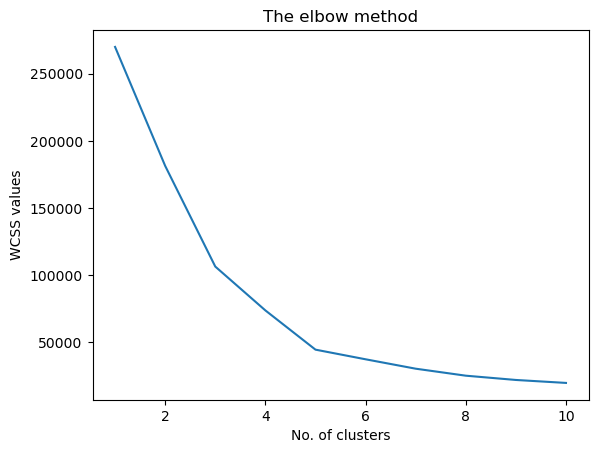

In [28]:
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel("No. of clusters")
plt.ylabel("WCSS values")
plt.show()

The above graph obtained shows that the "Elbow" is present at 5 , as the elbow is between 4 and 6 , so assumed as 5 

In [38]:
model_kmeans = KMeans(n_clusters = 5, init = 'k-means++',random_state=0)
#assigning the k means model 

In [41]:
y_predicted_kmeans= model_kmeans.fit_predict(df)
#fitting the model to the data and assigning the prediction value to a different variable 

Now plotting the result obtained in a graph using a Scatterplot and assigning different colors for different types of customers 

## Plotting the Scatterplot 

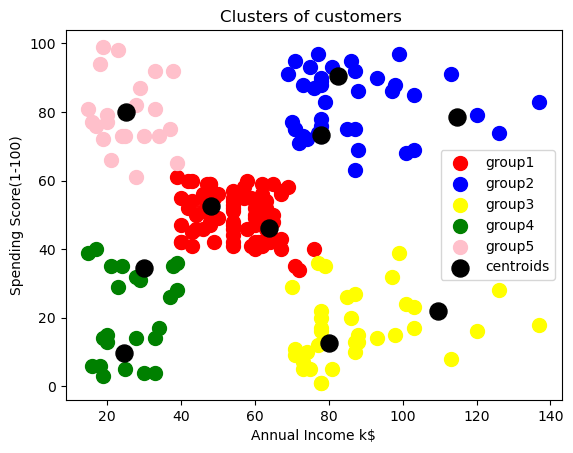

In [44]:
plt.scatter(df[y_predicted_kmeans == 0 ,0], df[y_predicted_kmeans ==0,1],s =100 ,c='red',label = 'group1') 
plt.scatter(df[y_predicted_kmeans == 1 ,0], df[y_predicted_kmeans ==1,1],s =100,c='blue',label = 'group2')    
plt.scatter(df[y_predicted_kmeans == 2 ,0], df[y_predicted_kmeans ==2,1],s =100,c='yellow',label = 'group3')    
plt.scatter(df[y_predicted_kmeans == 3 ,0], df[y_predicted_kmeans ==3,1],s =100,c='green',label = 'group4')    
plt.scatter(df[y_predicted_kmeans == 4 ,0], df[y_predicted_kmeans ==4,1],s =100,c='pink',label = 'group5')   

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,c= 'black',label='centroids')


plt.title("Clusters of customers ")
plt.xlabel('Annual Income k$')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

Black dots represent the centroids for every clusters ,

The Red dots represent group1 type of customers , who are the most balanced , they have mid level income and also their spending Score is in the mid level. 

The Blue dots represent group2 type of customers, who have high Annual Income and High Spending Score.

The Yellow dots represent group3 type of Customers, which have high Annula income but low Spending Score . 

The Green dots represent group4 type of Customers, they have low Annual income and low Spending Score. 

The Pink dots represent gorup5 type of Customers, they have low Annual income and high Spending Score.